# Genre Evolution Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the processed data
data_path = '../data/imdb_top_movies_cleaned.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,title,year,rating,genre,directors,revenue,lead_actors
0,The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
1,The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Marlon Brando, Mario Puzo, Peter Cl...",250342198,"Al Pacino, Marlon Brando, James Caan"
2,The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Salvatore Maroni, Michael Caine, Christian Bal...",1009057329,"Christian Bale, Aaron Eckhart, Heath Ledger"
3,The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Livio Giorgi, Al Pacino, Mario Puzo, Francis F...",47964222,"Al Pacino, Robert De Niro, Robert Duvall"
4,12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Jack Warden, Lee J. Cobb, Sidney Lumet, Regina...",2945,"Henry Fonda, Martin Balsam, Lee J. Cobb"


In [ ]:
# Explode genres into separate rows for analysis
df_exploded_genres = df.assign(genre=df["genre"].str.split(", ")).explode("genre")
print(len(df_exploded_genres))

1525


## 1. Most Successful Genres in Terms of Box Office Revenue
### **Explanation:**
- This section identifies the **top 10 highest-grossing genres** based on their **average box office revenue**.
- The dataset is processed to separate genres into individual entries for better analysis.
- A **bar plot** visualizes the genres that generate the most revenue on average.
- Genres like **superhero, sci-fi, and action** may dominate due to their high-budget productions and global appeal.

/var/folders/zy/l_s5vzv53fz8ysl24mcw4m_h0000gn/T/ipykernel_43570/1788254178.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette="coolwarm")


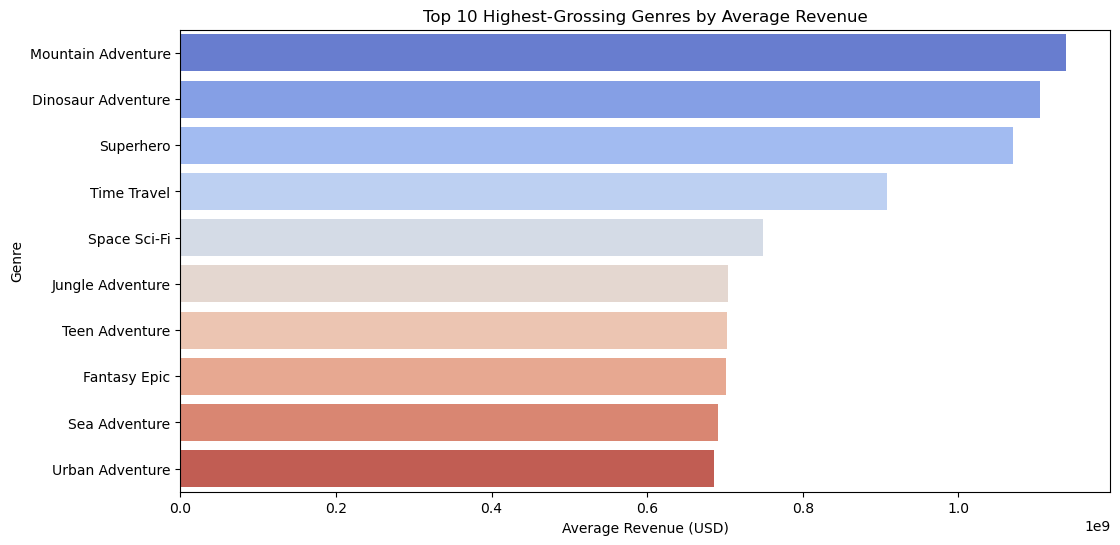

In [12]:
# --- 1. Most Successful Genres in Terms of Box Office Revenue ---
# Calculate average revenue per genre
genre_revenue = df_exploded_genres.groupby("genre")["revenue"].mean().sort_values(ascending=False).head(10)

# Bar plot for top 10 highest-grossing genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette="coolwarm")
plt.xlabel("Average Revenue (USD)")
plt.ylabel("Genre")
plt.title("Top 10 Highest-Grossing Genres by Average Revenue")
plt.show()

## 2. Changes in Genre Popularity Over the Decades
### **Explanation:**
- This section analyzes **how the popularity of movie genres has changed over time**.
- The dataset is modified to create a **decade column**, grouping movies into their respective decades.
- A **line plot** is generated to show the **rise and fall of genres** over different decades.
- The analysis may reveal trends such as:
  - The **rise of action and sci-fi movies in the 2000s and beyond**.
  - The **dominance of drama and crime films in earlier decades**.
  - The **emergence of fantasy and superhero genres with advancements in CGI and special effects**.

In [13]:
# --- 2. Changes in Genre Popularity Over the Decades ---
# Create decade column
df_exploded_genres["decade"] = (df_exploded_genres["year"] // 10) * 10

In [17]:
# Count genre occurrences per decade
genre_decade_trends = df_exploded_genres.groupby(["decade", "genre"]).size().unstack(fill_value=0)
genre_decade_trends

genre,Action,Action Epic,Adult Animation,Adventure,Adventure Epic,Alien Invasion,Animal Adventure,Animation,Anime,Artificial Intelligence,...,Tragedy,Tragic Romance,True Crime,Urban Adventure,War,War Epic,Western,Western Epic,Whodunnit,Workplace Drama
decade,,,,,,,,,,,,,,,,,,,,,
1920,2,0,0,2,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1930,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1940,0,0,0,1,0,0,0,0,0,0,...,3,0,0,0,4,0,1,0,1,0
1950,1,1,0,4,1,0,0,0,0,0,...,3,0,0,0,2,2,0,0,1,0
1960,1,0,0,4,3,0,0,0,0,1,...,2,0,0,0,5,2,3,2,0,0
1970,1,1,0,4,2,1,0,0,0,0,...,3,0,0,0,3,2,0,0,0,1
1980,7,2,1,6,4,2,0,2,2,2,...,7,0,0,2,6,3,0,0,0,0
1990,6,5,1,6,1,1,1,4,1,3,...,8,1,3,1,3,2,1,0,2,1
2000,8,6,1,15,6,0,3,9,2,1,...,13,0,2,2,5,1,0,0,1,0


In [16]:
# Select top 10 most frequent genres for trend analysis
top_genres = df_exploded_genres["genre"].value_counts().index[:10]
top_genres

Index(['Drama', 'Adventure', 'Epic', 'Crime', 'Thriller', 'Period Drama',
       'Tragedy', 'Comedy', 'Action', 'Psychological Drama'],
      dtype='object', name='genre')

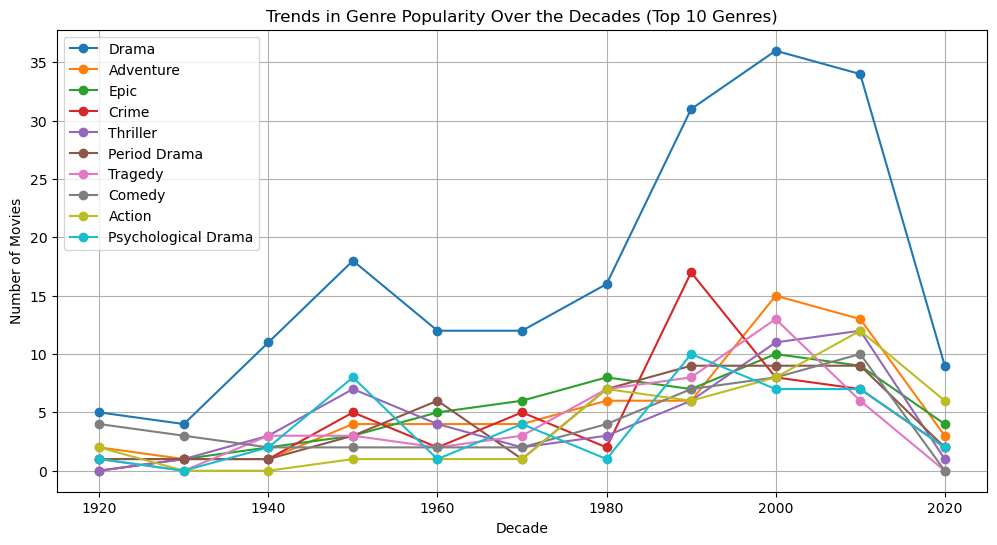

In [18]:
# Line plot for genre trends over the decades
plt.figure(figsize=(12, 6))
for genre in top_genres:
    plt.plot(genre_decade_trends.index, genre_decade_trends[genre], marker="o", label=genre)

plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Trends in Genre Popularity Over the Decades (Top 10 Genres)")
plt.legend()
plt.grid(True)
plt.show()

## 3. Audience Genre Preferences and Emerging Movie Technologies
### **Explanation:**
- This section investigates **how audience preferences for genres have shifted alongside advancements in movie technology**.
- A **heatmap** is used to visualize the **intensity of genre popularity per decade**.
- Observations may include:
  - A **gradual decline in classic genres like westerns and musicals**.
  - A **sharp increase in sci-fi and superhero movies due to technological advancements** (IMAX, 3D, CGI).
  - The **continued popularity of drama and thriller movies** as timeless storytelling genres.

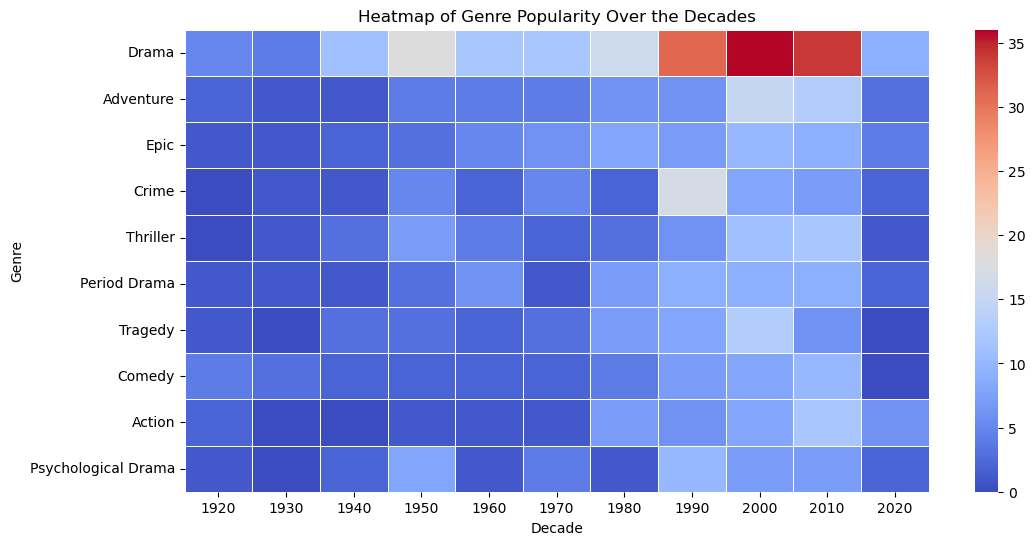

In [19]:
# --- 3. Audience Genre Preferences and Emerging Movie Technologies ---
# Heatmap to visualize genre distribution over time
plt.figure(figsize=(12, 6))
sns.heatmap(genre_decade_trends[top_genres].T, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.title("Heatmap of Genre Popularity Over the Decades")
plt.show()


<Figure size 1200x600 with 0 Axes>

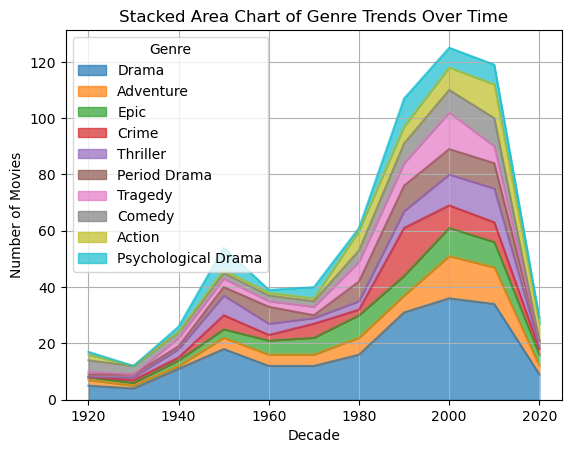

In [20]:
# Stacked Area Chart for Genre Trends Over Time
plt.figure(figsize=(12, 6))
genre_decade_trends[top_genres].plot(kind='area', stacked=True, alpha=0.7, colormap='tab10')

plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Stacked Area Chart of Genre Trends Over Time")
plt.legend(title="Genre", loc="upper left")
plt.grid(True)
plt.show()